### Import Data

In [74]:
import numpy as np
import pandas as pd
from scipy import stats

In [75]:
claims_data=pd.read_csv("claims.csv")
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [76]:
cust_data=pd.read_csv("cust_demographics.csv")
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [77]:
cust_claim_data=pd.merge(left=claims_data,right=cust_data,how="left",left_on='customer_id',right_on='CUST_ID')
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


### Perform a data audit

In [78]:
cust_claim_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [79]:
cust_claim_data['claim_date']=pd.to_datetime(cust_claim_data['claim_date'])
cust_claim_data['DateOfBirth']=pd.to_datetime(cust_claim_data['DateOfBirth'])
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

### Convert the column claim_amount

In [80]:
cust_claim_data['claim_amount']=cust_claim_data['claim_amount'].str.lstrip('$')
cust_claim_data['claim_amount']=pd.to_numeric(cust_claim_data['claim_amount'])
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

### Create an alert flag

In [81]:
cust_claim_data.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [82]:
cust_claim_data[((cust_claim_data['claim_type']=='Injury only') | (cust_claim_data['claim_type']=='Material and injury')) & (cust_claim_data['police_report']=='No')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,63916778.0,Male,2066-09-07,IL,146-157-4572,Platinum
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,17004138.0,Female,2065-08-13,WA,436-354-4682,Silver
26,71088680,32155446,Driver error,2017-12-24,Auto,No,Material and injury,32640.0,4.0,No,32155446.0,Male,1985-05-07,AZ,847-936-7645,Gold
29,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,80379865.0,Male,2069-02-27,NM,427-513-8479,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,78104894,20923121,Natural causes,2018-05-14,Auto,No,Material and injury,31210.0,1.0,No,20923121.0,Female,1976-07-05,NY,617-927-8491,Silver
1062,85546357,90217818,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1.0,Yes,90217818.0,Female,1980-05-18,TN,891-651-8671,Gold
1068,57326503,29854604,Other driver error,2018-07-20,Auto,No,Material and injury,44033.5,1.0,Yes,29854604.0,Male,1975-09-02,WI,214-457-4352,Gold
1087,45052103,55466148,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN


In [83]:
cust_claim_data['flag']=np.where(((cust_claim_data['claim_type']=='Injury only') | (cust_claim_data['claim_type']=='Material and injury')) & (cust_claim_data['police_report']=='No'),1,0)
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0


### customer ID should remain unique

In [84]:
cust_claim_data.shape

(1100, 17)

In [85]:
cust_claim_data.duplicated('customer_id').value_counts()

False    1093
True        7
dtype: int64

In [86]:
cust_claim_data.drop_duplicates('customer_id',keep='last',inplace=True)
cust_claim_data.shape

(1093, 17)

### Check and impute missing values

In [87]:
cust_claim_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
flag                    0
dtype: int64

In [88]:
cust_claim_data.claim_amount.fillna(cust_claim_data['claim_amount'].mean,inplace=True)
cust_claim_data.total_policy_claims.fillna(cust_claim_data['total_policy_claims'].mean,inplace=True)
cust_claim_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims     0
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
flag                    0
dtype: int64

### Calculate the age of customers

In [89]:
import datetime as dt

In [90]:
cust_claim_data['DateOfBirth']=pd.to_datetime(cust_claim_data['DateOfBirth'])

In [91]:
TODAY=pd.Timestamp.today().date().strftime("%Y-%m-%d")
type(TODAY)

str

In [92]:
TODAY=pd.to_datetime(TODAY)
TODAY

Timestamp('2021-07-31 00:00:00')

In [93]:
cust_claim_data.loc[cust_claim_data.DateOfBirth.dt.year>2020,'DateOfBirth']=cust_claim_data.loc[cust_claim_data.DateOfBirth.dt.year>2020,'DateOfBirth'].apply(lambda x : x-pd.DateOffset(years=100))
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0


In [94]:
cust_claim_data['age']=(TODAY-cust_claim_data.DateOfBirth).apply(lambda x: (x/365).days)
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,42.0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,51.0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,22.0
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN


In [95]:
cust_claim_data['age_grp']=np.where(cust_claim_data['age']<=18,'Children',np.where(cust_claim_data['age']<=30,'Youth',np.where(cust_claim_data['age']<=60,'Adult','Senior')))
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,42.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,51.0,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,22.0,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,Senior
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior


### average amount claimed by the customers

In [96]:
cust_claim_data['claim_amount']=pd.to_numeric(cust_claim_data['claim_amount'],errors='coerce')
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims            object
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
flag                            int32
age                           float64
age_grp                        object
dtype: object

In [97]:
cust_claim_data.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12868.127507
Platinum    12366.015896
Silver      12246.512579
Name: claim_amount, dtype: float64

### total claim amount based on incident

In [98]:
cust_claim_data.loc[cust_claim_data.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum()

incident_cause
Crime                  664582.0
Driver error          3194840.0
Natural causes        1202781.5
Other causes          3540989.0
Other driver error    3180621.5
Name: claim_amount, dtype: float64

In [99]:
cust_claim_data.incident_cause.unique()

array(['Driver error', 'Crime', 'Natural causes', 'Other driver error',
       'Other causes'], dtype=object)

In [100]:
cust_claim_data.loc[cust_claim_data.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum()

incident_cause
Crime                  664582.0
Driver error          3194840.0
Natural causes        1202781.5
Other causes          3540989.0
Other driver error    3180621.5
Name: claim_amount, dtype: float64

### adults from TX, DE and AK claimed insurance

In [101]:
cust_claim_data.State.unique()

array(['VT', 'ME', 'AR', 'AK', 'ID', 'RI', 'KY', 'NH', 'MD', 'MI', 'IL',
       'WA', 'SC', 'OK', 'KS', 'CT', 'IN', 'UT', 'AZ', 'IA', 'NM', 'WI',
       'WY', 'NY', 'LA', 'DE', 'GA', 'OH', 'SD', 'WV', 'MA', 'NJ', 'TX',
       'CA', 'TN', 'NC', 'MT', 'VA', 'OR', 'AL', 'HI', 'ND', 'MN', 'MO',
       'CO', 'FL', 'NE', 'MS', 'NV', 'PA', nan], dtype=object)

In [102]:
cust_claim_data.loc[
    (
        (cust_claim_data['State']=='TX') | (cust_claim_data['State']=='DE') | (cust_claim_data['State']=='AK')
    ) & 
        (cust_claim_data['age_grp']=='Adult')       
               
               ].groupby(by = "State")["State"].count()

State
AK    14
DE    20
TX    19
Name: State, dtype: int64

### pie chart

In [103]:
?gender_pie_chart.pivot_table

In [104]:
gender_pie_chart=cust_claim_data.groupby(['gender','Segment'])['claim_amount'].sum().reset_index()
gender_pivot=gender_pie_chart.pivot_table(values='claim_amount',index='gender',columns='Segment')
gender_pivot

Segment,Gold,Platinum,Silver
gender,,,
Female,1997529.0,2282210.0,1734782.5
Male,2493447.5,1996431.5,2159608.5


In [105]:
import matplotlib.pyplot as plt

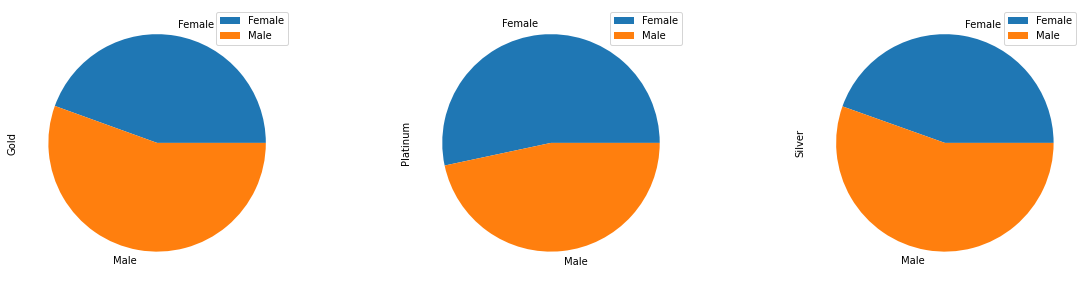

In [106]:
gender_pivot.plot(kind='pie',subplots=True,figsize=(20,5))
plt.show()

### driver related issues

In [107]:
gender_driver_issues=cust_claim_data.loc[(cust_claim_data['incident_cause']=='Driver error')| 
                                         (cust_claim_data['incident_cause']=='Other driver error')
                                        ].groupby('gender')[['gender']].count().add_prefix("Count_of_")
gender_driver_issues

,Count_of_gender
gender,
Female,221
Male,281


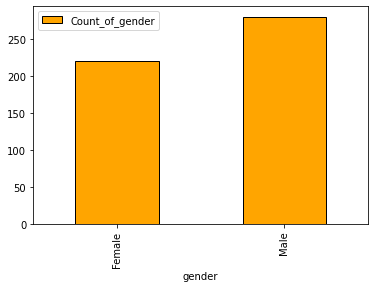

In [108]:
gender_driver_issues.plot(kind='bar',color='orange',edgecolor='black')
plt.show()

### age group with maximum fraudulent policy claims

In [109]:
cust_claim_data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'flag', 'age', 'age_grp'],
      dtype='object')

In [110]:
cust_claim_data.fraudulent.unique()

array(['No', 'Yes'], dtype=object)

In [111]:
Age_groupp_Fraudulent=cust_claim_data.loc[(cust_claim_data['fraudulent']=='Yes')].groupby('age_grp')[['age_grp']].count().add_prefix('Count_of_')
Age_groupp_Fraudulent

,Count_of_age_grp
age_grp,
Adult,184
Senior,14
Youth,54


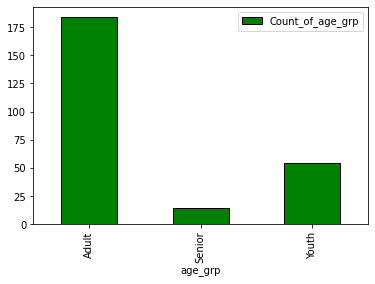

In [112]:
Age_groupp_Fraudulent.plot(kind='bar',color='green',edgecolor='black')
plt.show()

### Visualize the monthly trend

In [113]:
cust_claim_data['month']=cust_claim_data['claim_date'].apply(lambda x : pd.Timestamp.strftime(x,format='%B'))
cust_claim_data['month']

0       November
1        October
6        January
7          April
8       February
          ...   
1095        June
1096       March
1097    February
1098       March
1099        June
Name: month, Length: 1093, dtype: object

In [114]:
Month_Claim_Data=cust_claim_data.groupby('month')['claim_amount'].sum().reset_index()
Month_Claim_Data['Month_Num']= pd.DatetimeIndex(pd.to_datetime(Month_Claim_Data['month'], format='%B')).month
Month_Claim_Data.set_index('Month_Num').sort_index().reset_index()

,Month_Num,month,claim_amount
0,1,January,1239658.5
1,2,February,1138110.5
2,3,March,1286091.5
3,4,April,1268950.5
4,5,May,1015477.5
5,6,June,1243889.5
6,7,July,1270490.5
7,8,August,876080.5
8,9,September,858183.0
9,10,October,1315846.5


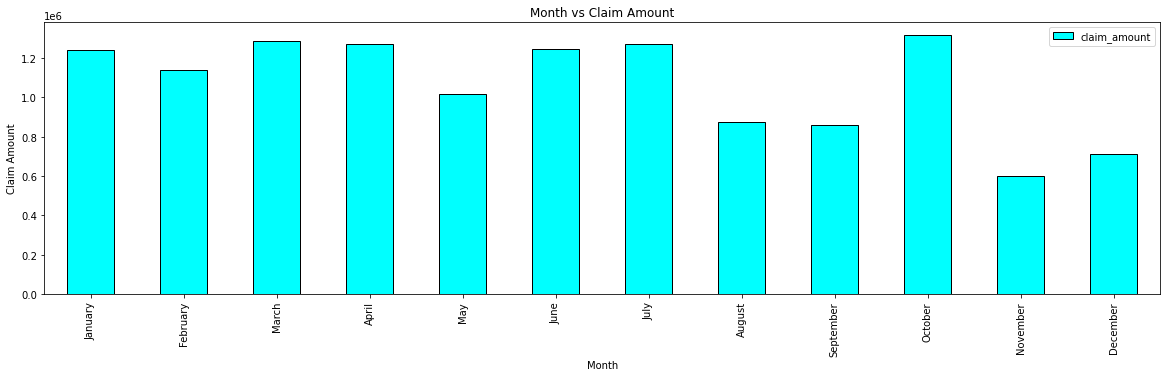

In [115]:
Month_Claim_Data.set_index('Month_Num').sort_index().plot(kind='bar',x='month',y='claim_amount',figsize=(20,5), color='cyan',edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Claim Amount')
plt.title('Month vs Claim Amount')
plt.show()

### facetted bar chart

In [116]:
cust_claim_data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'flag', 'age', 'age_grp', 'month'],
      dtype='object')

In [117]:
cust_claim_data.age_grp.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [118]:
gender_age_fraud=cust_claim_data.groupby(['gender','age_grp','fraudulent'])['claim_amount'].mean().reset_index()
gender_age_fraud.dropna()

,gender,age_grp,fraudulent,claim_amount
0,Female,Adult,No,12074.699647
1,Female,Adult,Yes,12053.550562
2,Female,Senior,No,40180.000000
3,Female,Senior,Yes,2530.000000
4,Female,Youth,No,13031.515152
5,Female,Youth,Yes,8650.738095
6,Male,Adult,No,12517.355932
7,Male,Adult,Yes,16029.357143
8,Male,Senior,No,9471.000000
9,Male,Senior,Yes,20165.250000


In [119]:
gender_age_fraud_pivot=gender_age_fraud.pivot_table(index=['gender','age_grp'],values='claim_amount',columns='fraudulent')
gender_age_fraud_pivot

fraudulent                No           Yes
gender age_grp                            
Female Adult    12074.699647  12053.550562
       Senior   40180.000000   2530.000000
       Youth    13031.515152   8650.738095
Male   Adult    12517.355932  16029.357143
       Senior    9471.000000  20165.250000
       Youth    12016.701031  11471.888889

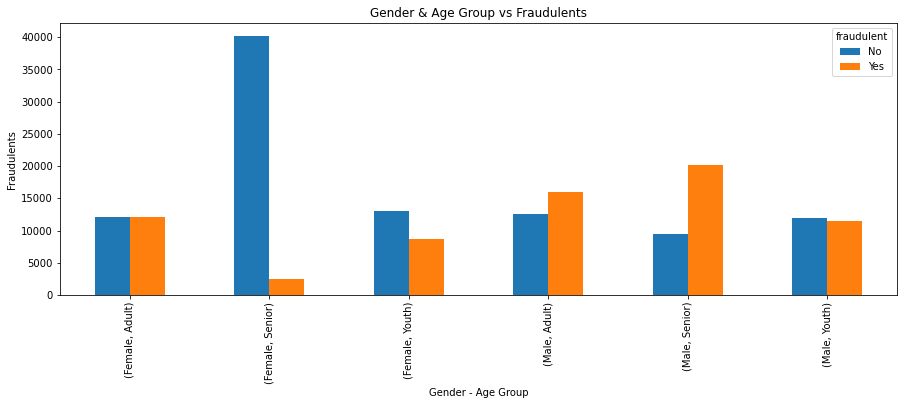

In [120]:
gender_age_fraud_pivot.plot(kind='bar',figsize=(15,5))
plt.xlabel('Gender - Age Group')
plt.ylabel('Fraudulents')
plt.title('Gender & Age Group vs Fraudulents')
plt.show()

### similarity in the amount claimed by males and females

In [121]:
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,age_grp,month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,0,42.0,Adult,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,0,51.0,Adult,October
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,0,22.0,Youth,January
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,0,21.0,Youth,April
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,0,27.0,Youth,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior,June
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior,March
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaN,NaT,NaN,NaN,NaN,1,NaN,Senior,February
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaN,NaT,NaN,NaN,NaN,0,NaN,Senior,March


In [122]:
cust_claim_data['gender_in_num']=np.where(cust_claim_data.gender=='Male',1,np.where(cust_claim_data.gender=='Female',2,np.nan))
cust_claim_data['gender_in_num'].value_counts()

1.0    551
2.0    527
Name: gender_in_num, dtype: int64

In [123]:
?stats.ttest_ind

In [124]:
Male_Sample=cust_claim_data.claim_amount.loc[cust_claim_data['gender_in_num']==1]
Male_Sample

6        1730.0
7        1160.0
8        2620.0
11      16690.0
12       1870.0
         ...   
1077     2290.0
1078     2320.0
1079     2173.5
1082    33080.0
1084     1490.0
Name: claim_amount, Length: 551, dtype: float64

In [125]:
Female_Sample=cust_claim_data.claim_amount.loc[cust_claim_data['gender_in_num']==2]
Female_Sample

0        2980.0
1        2980.0
9        2748.5
10       1495.0
14      32560.0
         ...   
1072    38950.0
1076     1380.0
1080     1770.0
1081     2800.0
1083     2840.0
Name: claim_amount, Length: 527, dtype: float64

In [126]:
Male_Sample=Male_Sample.dropna()
Female_Sample=Female_Sample.dropna()

<h4>H0: There is no similarity in claims between Males and Females. <br> <br>
H1: There is similarity in claims between Males and Females.

In [127]:
t_test_result=stats.ttest_ind(Male_Sample,Female_Sample)

In [128]:
?stats.ttest_ind

In [129]:
t_test_result

Ttest_indResult(statistic=0.9629190005841617, pvalue=0.3358184247792393)

<center><b> pvalue of 0.335 is greater than 0.05 confidence level. </b><br> <br> Therefore, we accept H0. <br> <br> <i> There is no similarity in claims between Males and Females

### relationship between age category and segment 

In [130]:
agegrp_seg_xtab=pd.crosstab(cust_claim_data.Segment,cust_claim_data.age_grp)
agegrp_seg_xtab

age_grp,Adult,Senior,Youth
Segment,,,
Gold,285,4,82
Platinum,257,11,93
Silver,253,6,87


<h4>H0: There is no relationship between age category and segment. <br> <br>
H1: There is relationship between age category and segment.

In [131]:
stats.chi2_contingency?

In [132]:
chi_square_test=stats.chi2_contingency(agegrp_seg_xtab)
chi_square_test

(5.729891376558459,
 0.22024866873276633,
 4,
 array([[273.6038961 ,   7.22727273,  90.16883117],
        [266.22912801,   7.03246753,  87.73840445],
        [255.16697588,   6.74025974,  84.09276438]]))

In [133]:
chi_square_test[1]

0.22024866873276633

<center><b> pvalue of 0.427 is greater than 0.05 confidence level. </b><br> <br> Therefore, we accept H0. <br> <br> <i> There is no relationship between age category and segment.

### significant rise in claim amounts

In [134]:
t_test=stats.ttest_1samp((cust_claim_data['claim_amount'].dropna()),10000)

In [135]:
t_test.pvalue

1.0845613998034784e-08

### difference between age groups and insurance claims

<h4>H0: There is no difference between age groups and insurance claims. <br> <br>
H1: There is difference between age groups and insurance claims.

In [136]:
cust_claim_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims            object
fraudulent                     object
CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
flag                            int32
age                           float64
age_grp                        object
month                          object
gender_in_num                 float64
dtype: object

In [137]:
cust_claim_data.age_grp.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [144]:
Group1=cust_claim_data.claim_amount.loc[cust_claim_data.age_grp=='Adult'].reset_index(drop=True).dropna()
Group1.mean()

12688.404793608523

In [145]:
Group2=cust_claim_data.claim_amount.loc[cust_claim_data.age_grp=='Youth'].reset_index(drop=True).dropna()
Group2.mean()

12078.469262295082

In [146]:
Group3=cust_claim_data.claim_amount.loc[cust_claim_data.age_grp=='Senior'].reset_index(drop=True).dropna()
Group3.mean()

10558.636363636364

In [147]:
f,p=stats.f_oneway(Group1,Group2)

In [148]:
p

0.548599497263169

<center><b> pvalue of 0.54 is greater than 0.05 confidence level. </b><br> <br> Therefore, we accept H0. <br> <br> <i> There is no relationship between age group and insurance claims.

### relationship between total number of policy claims and the claimed amount

In [71]:
Relationship=cust_claim_data.corr().loc['total_policy_claims','claim_amount']

In [72]:
print(Relationship)

-0.02476502362633834


<b><center>The Total nummber of Policy Claims and The Claimed Ammount are negatively related.</ceneter></b>